# Análisis exploratorio de datos aplicado a un conjunto de datos de jugadores de la NBA

El siguiente trabajo corresponde a una tarea correspondiente al módulo 3 del diplomado de Ciencia de Datos impartido por la Faculta de Química: 

## Acerca del conjunto de datos:

El conjunto de datos fue adquirido de Kaggle y se encuentra disponible en la siguiente URL: https://www.kaggle.com/datasets/vsharma19/nbacsv. Este dataset proporciona información variada sobre jugadores de la NBA, incluyendo datos como nombre, equipo, número, posición, edad, altura, peso, colegio y salario.

In [75]:
# Importación de las librerias necesarias: 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

##  Análisis exploratorio de datos:

In [76]:
#Creación del DataFrame:
da = pd.read_csv('nba.csv')

da.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [77]:
da.shape

(458, 9)

Al analizar nuestro conjunto de datos, se destacan dos aspectos significativos:

En primer lugar, notamos que el peso se encuentra expresado en unidades que parecen ser libras, mientras que la altura está presentada en un formato de pies y pulgadas. Con el propósito de homogeneizar las unidades, planeamos ajustar la variable de peso a kilogramos y cambiar las unidades de altura a centímetros.

En segundo lugar, hemos identificado la presencia de valores faltantes. Uno de ellos pertenece a una variable categórica, específicamente, la institución educativa a la que asistió cada jugador profesional de baloncesto en la NBA. Esta ausencia de datos podría deberse a que el jugador no asistió a ninguna universidad o a que la universidad a la que asistió no está ubicada en los Estados Unidos.

En consecuencia, procederemos a realizar las modificaciones mencionadas en las columnas y analizaremos la cantidad de datos faltantes con el objetivo de obtener un dataframe libre de dichas irregularidades.

In [78]:
# Imprimir número de valores nulos
print("Número de valores nulos por columna:")
print(da.isnull().sum())

# Reemplazar los valores NaN por "Sin colegio" en la columna 'College'
da['College'] = da['College'].fillna("Sin colegio")

# Creación de un DataFrame sin valores faltantes:
da2 = da.dropna()

# Confirmar si en efecto, no se tienen valores faltantes en el DataFrame:
print("\nNúmero de valores nulos en da2:")
print(da2.isnull().sum())

# Renombramiento de las variables antes de las conversiones:
altura = da2['Height']
peso = da2['Weight']
salario = da2['Salary']
colegios = da2['College']
edad = da2['Age']
colegios = da2['College']

# Realizar la conversión de altura de pies y pulgadas a centímetros en da2
altura = altura.apply(lambda x: (int(x.split('-')[0]) * 30.48) + (int(x.split('-')[1]) * 2.54))

# Realizar la conversión de peso de libras a kilogramos en da2
peso = peso / 2.205
peso = peso.round(2)

# Imprimir las primeras filas del nuevo DataFrame da2 con las conversiones
da2.head()


Número de valores nulos por columna:
Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

Número de valores nulos en da2:
Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,Sin colegio,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,Sin colegio,12000000.0


Ahora se quiere conocer el peso promedio de los jugadores la liga, así como la altura mínima de algún jugador en la liga:

In [79]:
# Calcular el peso promedio y la estatura mínima
peso_promedio = peso.mean().round(2)
estatura_minima = altura.min()

# Imprimir el peso promedio y la estatura mínima
print(f'El peso promedio es: {peso_promedio} kg')
print(f'La estatura mínima es: {estatura_minima} metros')

El peso promedio es: 100.57 kg
La estatura mínima es: 175.26 metros


A continuación se analizará como es que estos datos estan ditribuidos donde se analizarán distintas variables de interés en un gráfico de dispersión: 

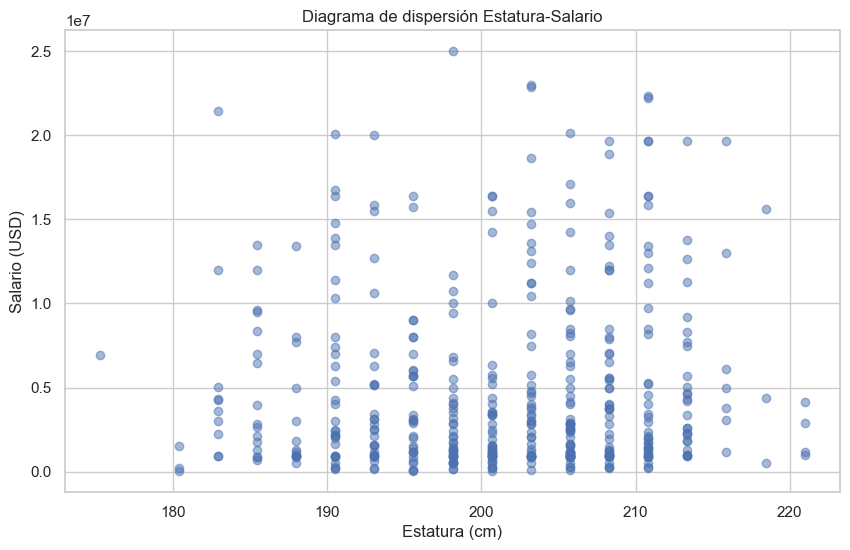

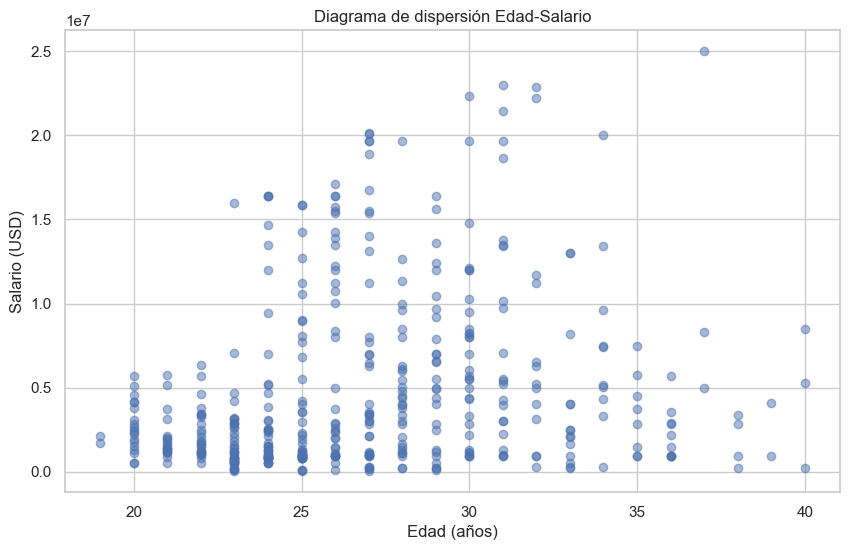

In [80]:
# Crear un diagrama de dispersión Estatura-Salario
plt.figure(figsize=(10, 6))
plt.scatter(altura, salario, alpha=0.5)
plt.title('Diagrama de dispersión Estatura-Salario')
plt.xlabel('Estatura (cm)')
plt.ylabel('Salario (USD)')
plt.grid(True)
plt.show()

# Crear un diagrama de dispersión Estatura-Peso
plt.figure(figsize=(10, 6))
plt.scatter(edad, salario, alpha=0.5)
plt.title('Diagrama de dispersión Edad-Salario')
plt.xlabel('Edad (años)')
plt.ylabel('Salario (USD)')
plt.grid(True)
plt.show()

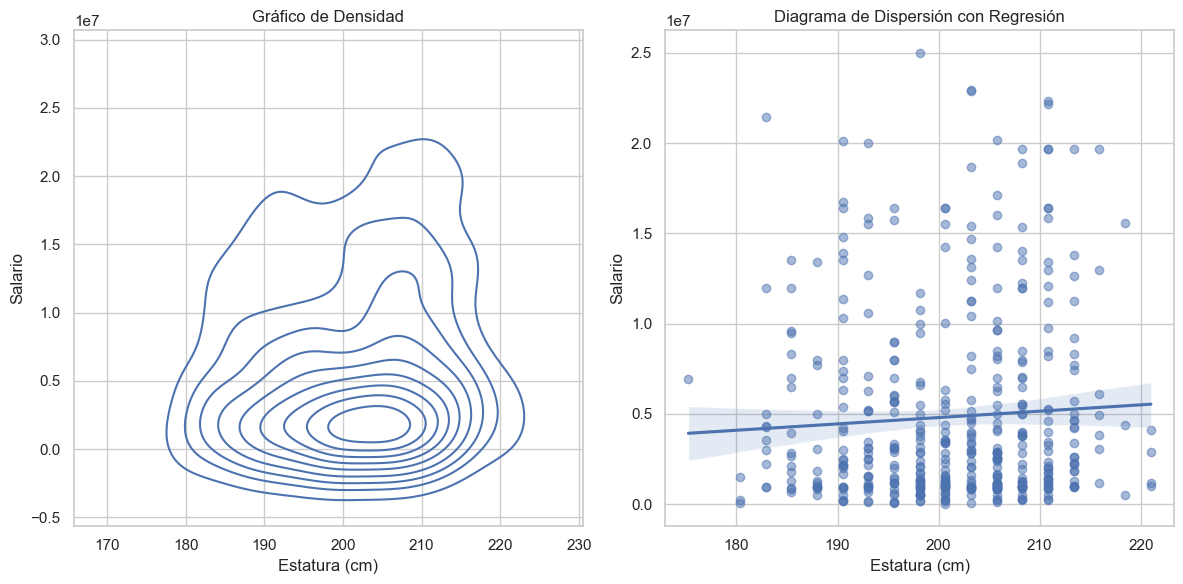

In [81]:
# Crear un gráfico de densidad y un diagrama de dispersión con regresión de la altura vs el salario:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
plt.subplot(1, 2, 1)
sns.kdeplot(x=altura, y=salario,)
plt.xlabel('Estatura (cm)')
plt.ylabel('Salario')
plt.title('Gráfico de Densidad')

plt.subplot(1, 2, 2)
sns.regplot(x=altura, y=salario, scatter_kws={'alpha':0.5})
plt.xlabel('Estatura (cm)')
plt.ylabel('Salario')
plt.title('Diagrama de Dispersión con Regresión')
plt.tight_layout()
plt.show()

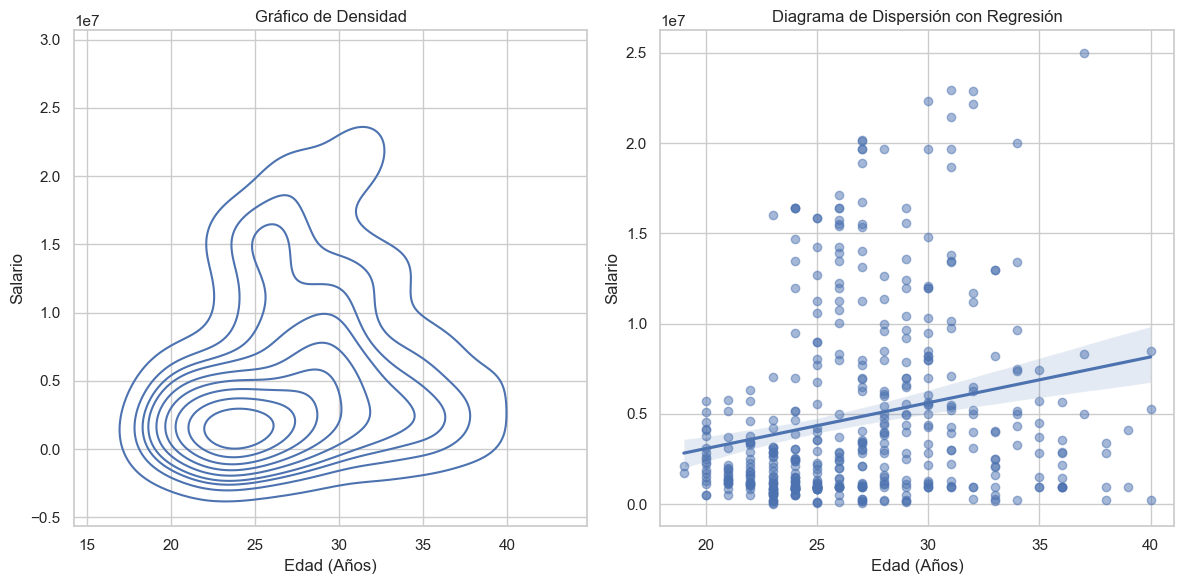

In [82]:
# Crear un gráfico de densidad y un diagrama de dispersión con regresión de la edad vs  el salario:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
plt.subplot(1, 2, 1)
sns.kdeplot(x=edad, y=salario,)
plt.xlabel('Edad (Años)')
plt.ylabel('Salario')
plt.title('Gráfico de Densidad')

plt.subplot(1, 2, 2)
sns.regplot(x=edad, y=salario, scatter_kws={'alpha':0.5})
plt.xlabel('Edad (Años)')
plt.ylabel('Salario')
plt.title('Diagrama de Dispersión con Regresión')
plt.tight_layout()
plt.show()

Como se puede ver existe poca correlación entre estás variables, a continuación se obtendrá un valor númerico para saber que tan correlacionadas se encuentran estas variables: 

In [83]:
# Calcular el coeficiente de correlación entre Estatura y Salario
correlacion_estatura_salario = np.corrcoef(altura, salario)[0, 1].round(4)
print(f"Coeficiente de correlación Estatura-Salario: {correlacion_estatura_salario}")

# Calcular el coeficiente de correlación entre Estatura y Peso
correlacion_edad_salario = np.corrcoef(edad, salario)[0, 1].round(4)
print(f"Coeficiente de correlación Edad-Salario: {correlacion_edad_salario}")


Coeficiente de correlación Estatura-Salario: 0.0588
Coeficiente de correlación Edad-Salario: 0.2135


A coninuación se elaborará un histográma para saber la distribución de colegios de los que vienen los distintos jugadores de la liga: 

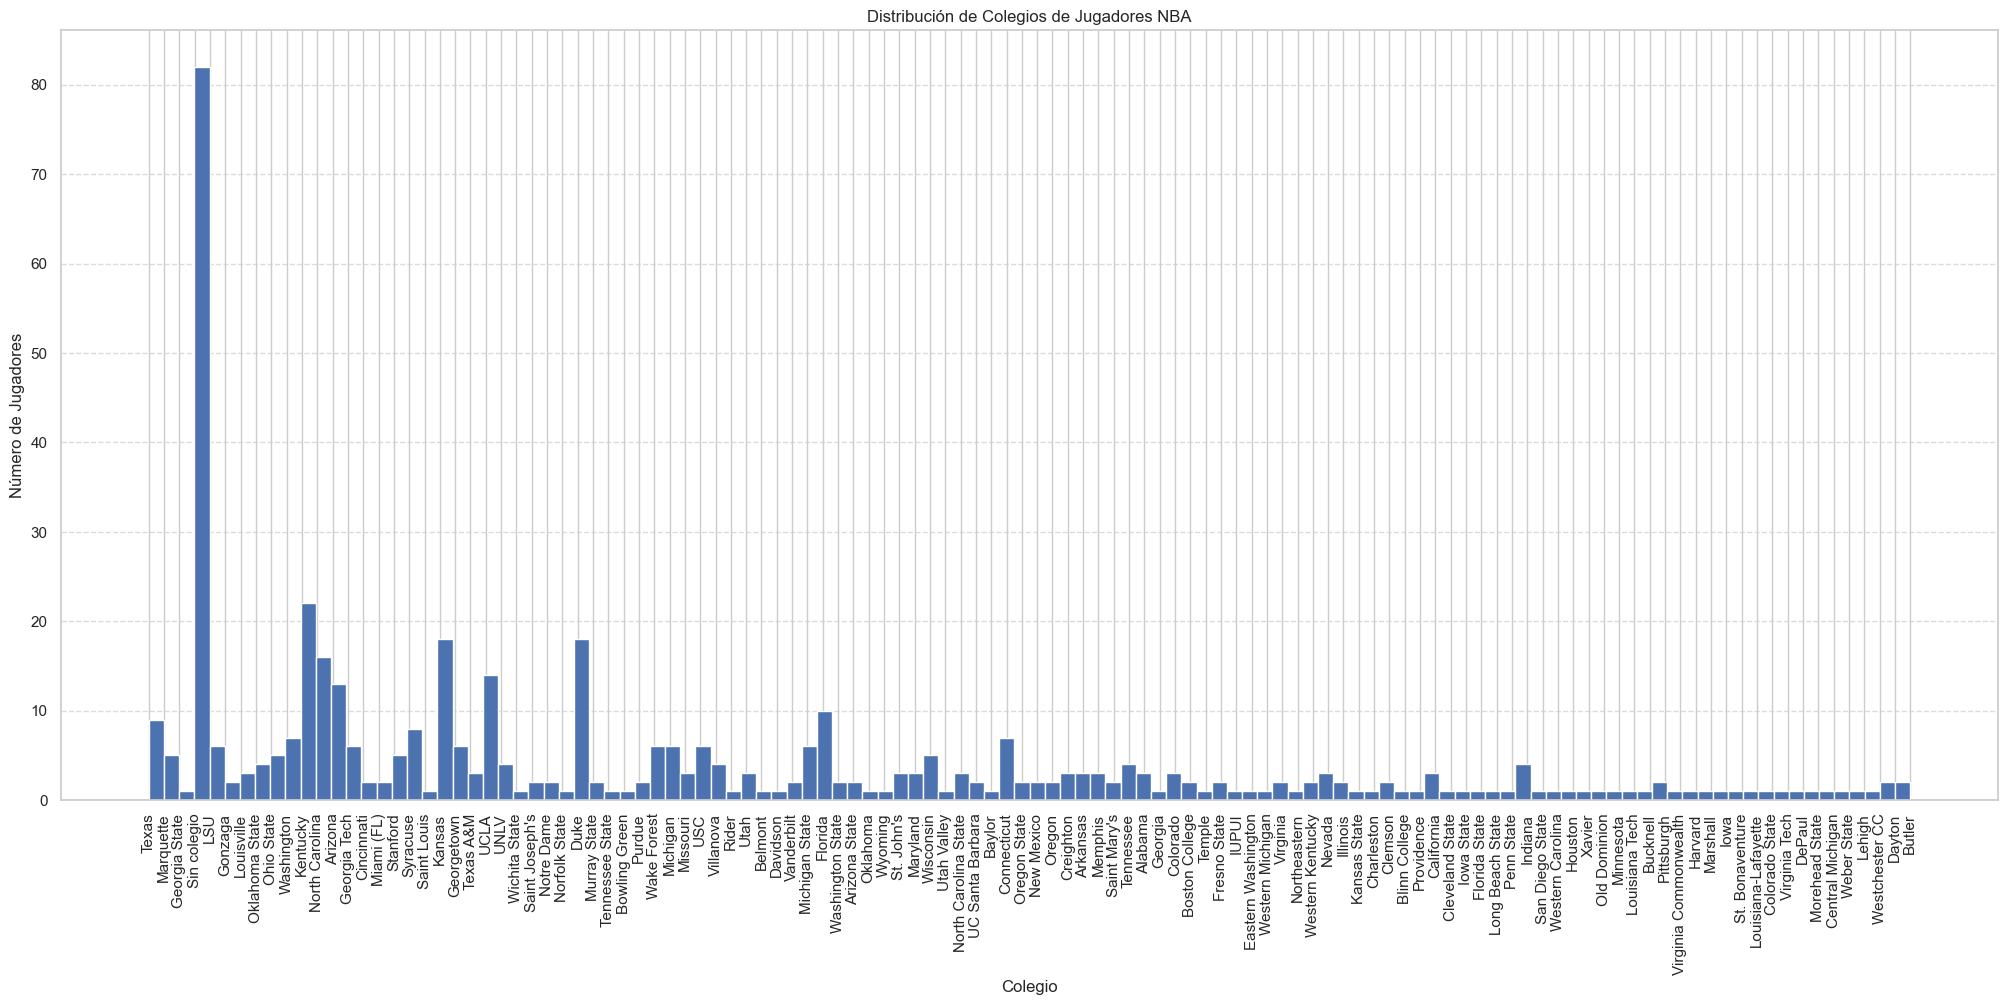

In [84]:
# Crear un histograma de la distribución de colegios
plt.figure(figsize=(25, 10))
plt.hist(colegios, bins=len(colegios.unique()))
plt.title('Distribución de Colegios de Jugadores NBA')
plt.xlabel('Colegio')
plt.ylabel('Número de Jugadores')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Como se evidencia, una notable proporción de jugadores en la liga no tuvo afiliación universitaria, alcanzando un total de 82 jugadores. Esta cifra supera incluso a las universidades con mayor representación en la liga, como Kentucky, que cuenta con 22 jugadores. A continuación, se presenta una lista con las 10 universidades que tienen la mayor cantidad de jugadores, acompañada por el porcentaje de jugadores que asistió a alguna universidad, así como el porcentaje de jugadores que no tuvo afiliación universitaria.

In [85]:
# Filtra jugadores con colegio y jugadores sin colegio
jugadores_con_colegio = colegios[colegios != 'Sin colegio']
jugadores_sin_colegio = colegios[colegios == 'Sin colegio']

# Calcula el porcentaje de jugadores con colegio
porcentaje_con_colegio = (len(jugadores_con_colegio) / len(colegios)) * 100

# Calcula el porcentaje de jugadores sin colegio
porcentaje_sin_colegio = 100 - porcentaje_con_colegio

# Imprime los resultados con formato de 2 decimales
print(f'El porcentaje de jugadores con colegio es de {porcentaje_con_colegio:.2f} %.')
print(f'El porcentaje de jugadores sin colegio es de {porcentaje_sin_colegio:.2f} %.')


El porcentaje de jugadores con colegio es de 81.61 %.
El porcentaje de jugadores sin colegio es de 18.39 %.


In [86]:
# Contar la frecuencia de cada colegio
top_10_colegios = colegios.value_counts().iloc[1:11]

# Imprimir la lista de los 10 colegios con mayor cantidad de alumnos
print("Los 10 colegios con mayor cantidad de alumnos:")
print(top_10_colegios)


Los 10 colegios con mayor cantidad de alumnos:
College
Kentucky          22
Duke              18
Kansas            18
North Carolina    16
UCLA              14
Arizona           13
Florida           10
Texas              9
Syracuse           8
Washington         7
Name: count, dtype: int64


A su vez, puede ser interesante saber cuales equipos de la NBA cuentan con una mayor cantidad de jugadores, y cual equipo cuanta con la menor cantidad de jugadores.

In [87]:
# Selecciona la columna 'Team' del conjunto de datos y elimina filas con valores nulos
equipo = da2['Team']

# Cuenta la cantidad de jugadores por equipo y crea una serie con los nombres de los equipos como índices
jugadores_equipo = equipo.value_counts()

# Encuentra el nombre del equipo con la mayor cantidad de jugadores y la cantidad máxima
equipo_max, num_max = jugadores_equipo.idxmax(), jugadores_equipo.max()

# Encuentra el nombre del equipo con la menor cantidad de jugadores y la cantidad mínima
equipo_min, num_min = jugadores_equipo.idxmin(), jugadores_equipo.min()

# Imprime los resultados
print(f'El equipo con más jugadores es {equipo_max} con {num_max}.')
print(f'El equipo con menos jugadores es {equipo_min} con {num_min}.')



El equipo con más jugadores es New Orleans Pelicans con 19.
El equipo con menos jugadores es Miami Heat con 13.


A continuación se solicita saber cuales son los promedios de salario de todos los jugadores en general, así como el promedio del salario de los integrantes por cada equipo de la NBA:

In [88]:
salario_promedio = round(salario.mean(), 2)  # Redondear el salario promedio a dos decimales

# Imprimir el salario promedio global
print(f'Salario promedio de todos los jugadores: $ {salario_promedio}')

# Calcular y redondear el promedio del salario por equipo
promedio_salario_por_equipo = round(da2.groupby('Team')['Salary'].mean(), 2)

# Imprimir el promedio del salario por equipo
print('Promedio del salario por equipo:')
print(promedio_salario_por_equipo)

Salario promedio de todos los jugadores: $ 4842684.11
Promedio del salario por equipo:
Team
Atlanta Hawks             4860196.67
Boston Celtics            4181504.86
Brooklyn Nets             3501898.33
Charlotte Hornets         5222728.00
Chicago Bulls             5785558.53
Cleveland Cavaliers       7642049.21
Dallas Mavericks          4746582.13
Denver Nuggets            4294423.57
Detroit Pistons           4477884.20
Golden State Warriors     5924599.80
Houston Rockets           5018868.07
Indiana Pacers            4450121.73
Los Angeles Clippers      6323642.67
Los Angeles Lakers        4784695.40
Memphis Grizzlies         5467920.00
Miami Heat                6347359.46
Milwaukee Bucks           4350219.81
Minnesota Timberwolves    4593053.62
New Orleans Pelicans      4355303.89
New York Knicks           4581493.62
Oklahoma City Thunder     6251019.87
Orlando Magic             4297247.86
Philadelphia 76ers        2213778.14
Phoenix Suns              4229675.67
Portland Trail Blaze

Siguiendo con está tendencia, otro dato que podría resultar interesante considerar es cuales son los número de camiseta y la psoción más utilizada por jugadores de la liga.

In [89]:
# Selecciona las columnas 'Number' y 'Position' y elimina filas con valores nulos
numeros = da2['Number']
posiciones = da2['Position']

# Calcula la popularidad de los números de camiseta
contador_numeros = numeros.value_counts()

# Encuentra el número máximo de veces que se utiliza un número de camiseta
max_num_num = contador_numeros.max()

# Filtra los números de camiseta que tienen la popularidad máxima (pueden haber empates)
numeros_mas_populares = contador_numeros[contador_numeros == max_num_num]

# Convierte los números más populares a una cadena separada por comas
numeros_más_populares_str = ', '.join(map(str, numeros_mas_populares.index))

# Calcula la popularidad de las posiciones
contador_posiciones = posiciones.value_counts()

# Encuentra el número máximo de veces que se juega en una posición
max_num_posiciones = contador_posiciones.max()

# Filtra las posiciones que tienen la popularidad máxima (pueden haber empates)
posiciones_mas_utilizadas = contador_posiciones[contador_posiciones == max_num_posiciones]

# Convierte las posiciones más utilizadas a una cadena separada por comas
posiciones_mas_utilizadas_str = ', '.join(posiciones_mas_utilizadas.index)

print("Los números de camiseta más populares son:", numeros_más_populares_str)
print("Las posiciones más utilizadas son:", posiciones_mas_utilizadas_str)

Los números de camiseta más populares son: 5.0
Las posiciones más utilizadas son: SG


A continuación se elaborará un díagrama de pie donde se agruparán a los jugadores en categorias de acuerdo al salario que perciben: 

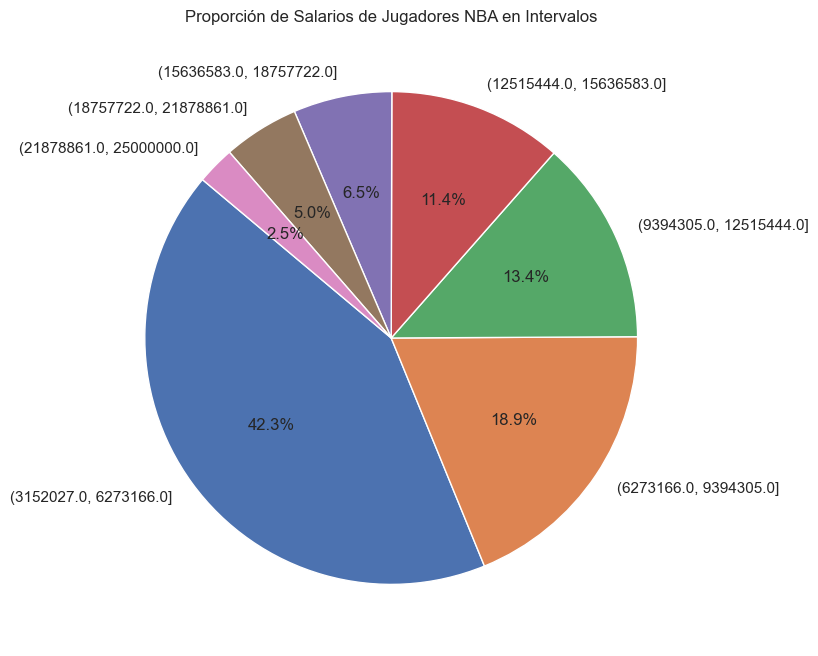

In [90]:
# Calcular el rango (amplitud de intervalo) para dividir los salarios en clases/categorías
rango_salario = salario.max() - salario.min()
num_intervalos = 8  # Número deseado de intervalos

# Calcular el tamaño del intervalo
amplitud_intervalo = rango_salario / num_intervalos

# Inicializar la lista de límites
limites = []

# Calcular los límites de los intervalos
for i in range(1, num_intervalos + 1):
    limite = salario.min() + amplitud_intervalo*i
    limites.append((limite))

# Asignar los salarios a los intervalos utilizando pd.cut()
intervalos = pd.cut(salario, bins= limites)

# Calcular la cantidad de jugadores en cada intervalo
conteo_intervalos = intervalos.value_counts()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
plt.pie(conteo_intervalos, labels=conteo_intervalos.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Salarios de Jugadores NBA en Intervalos')
plt.show()

In [91]:
# Calcular la cantidad de jugadores en cada intervalo
conteo_intervalos = intervalos.value_counts()

# Imprimir la cantidad de jugadores para cada intervalo
for intervalo in conteo_intervalos.index:
    cantidad_jugadores = conteo_intervalos[intervalo]
    print(f"Intervalo: {intervalo}, Cantidad de jugadores: {cantidad_jugadores}")


Intervalo: (3152027.0, 6273166.0], Cantidad de jugadores: 85
Intervalo: (6273166.0, 9394305.0], Cantidad de jugadores: 38
Intervalo: (9394305.0, 12515444.0], Cantidad de jugadores: 27
Intervalo: (12515444.0, 15636583.0], Cantidad de jugadores: 23
Intervalo: (15636583.0, 18757722.0], Cantidad de jugadores: 13
Intervalo: (18757722.0, 21878861.0], Cantidad de jugadores: 10
Intervalo: (21878861.0, 25000000.0], Cantidad de jugadores: 5


Se observa que la mayor cantidad de jugadores se encuentra en el intervalo de salarios más bajo, y la cantidad de jugadores disminuye a medida que se incrementa el salario. Esta tendencia se puede apreciar de manera más clara en un boxplot, donde los jugadores con salarios más altos se consideran valores atípicos, y en un histograma, donde se espera observar un sesgo hacia la derecha.

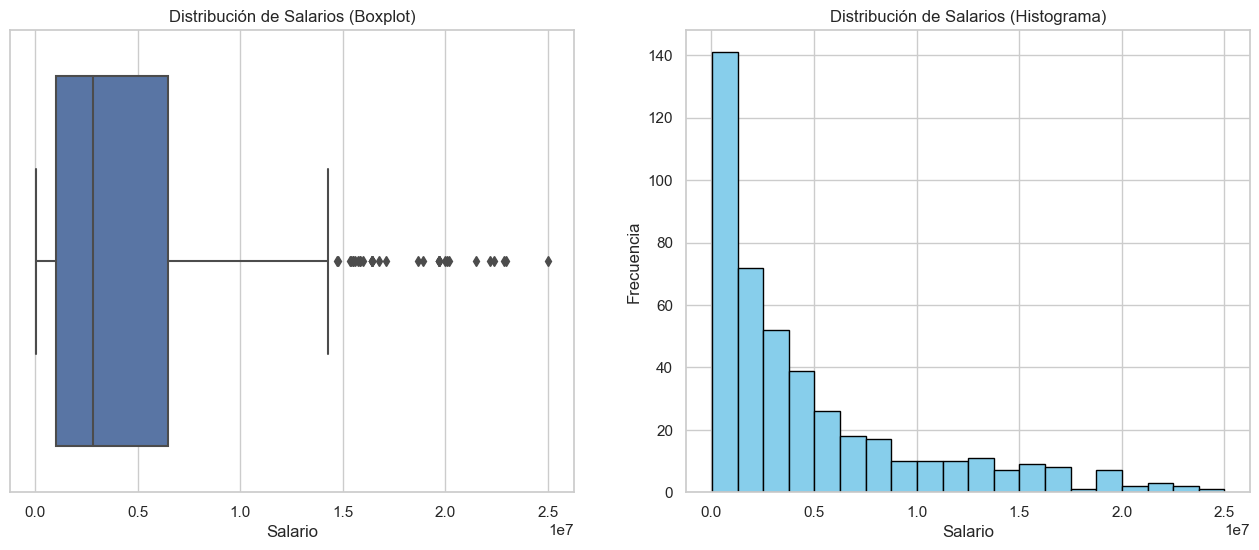

In [92]:
# Crear un boxplot y un histograma en subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot
sns.boxplot(x=salario, ax=axs[0])
axs[0].set_title('Distribución de Salarios (Boxplot)')
axs[0].set_xlabel('Salario')

# Histograma
axs[1].hist(salario, bins=20, color='skyblue', edgecolor='black')
axs[1].set_title('Distribución de Salarios (Histograma)')
axs[1].set_xlabel('Salario')
axs[1].set_ylabel('Frecuencia')

plt.show()
